## Chelsea Jaculina
## 011274913
## DATA 266 HW 3 Q1
## Naive RAG vs Re-Ranking RAG

In [1]:
!pip install faiss-cpu sentence-transformers openai transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [2]:
import pandas as pd
import json

# Load your JSON file (replace with your own path or upload)
df = pd.read_json("hf://datasets/itinerai/restaurants/restaurant_data.json")  # Modify if needed

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
# Preview
df.head()

,ID,NAME,TRIPADVISOR_URL,RESTAURANT_URL,PICTURE,RATING,DESTINATION,DESCRIPTION,LATITUDE,LONGITUDE,GENERAL_LOCATION,NUMBER_OF_REVIEWS,REVIEW_TAGS,CUISINES,DISHES,MEAL_TYPES,FEATURES,HOURS,PRICE_LEVEL,PRICE_RANGE
0,19245342,The Consulate UWS,https://www.tripadvisor.com/Restaurant_Review-...,http://www.theconsulate.nyc,https://media-cdn.tripadvisor.com/media/photo-...,5.0,New York City,To make direct reservation visit our website T...,40.785816,-73.972460,"519 Columbus Ave, 10024-3402",300,"[brunch, upper west side, neighborhood, nyc, g...","[French, American, Bar, Pub, Vegetarian Friend...","[Pasta, Burger, Ribs, Steak Tartare, Salad, Mu...","[Lunch, Dinner, Brunch, Breakfast, Drinks]","[Gift Cards Available, Reservations, Outdoor S...","[[{'open': 600, 'openHours': '10:00', 'close':...",$$ - $$$,$12 - $169
1,1553124,The Standard Grill,https://www.tripadvisor.com/Restaurant_Review-...,http://thestandardgrill.com,https://media-cdn.tripadvisor.com/media/photo-...,4.0,New York City,"A neighborhood staple, The Standard Grill is c...",40.740612,-74.007820,"Corner of Washington and West 13th Street, 10014",2009,"[brunch, nyc, burger, the high line, new york,...","[American, Bar, Vegetarian Friendly, Vegan Opt...","[Pasta, Cheesecake, Crab, French Toast, Burger...","[Breakfast, Lunch, Dinner, Brunch, Late Night]","[Reservations, Outdoor Seating, Seating, Highc...","[[{'open': 420, 'openHours': '07:00', 'close':...",$$ - $$$,$30
2,4522078,Bill's Bar & Burger,https://www.tripadvisor.com/Restaurant_Review-...,https://www.billsbarandburger.com/location/bil...,https://media-cdn.tripadvisor.com/media/photo-...,4.5,New York City,"Serving homage to burger and shake lovers, Bil...",40.709488,-74.014370,"85 West St, 10006",1514,"[burger, fries, memorial, nyc, new york, milks...","[American, Bar, Vegetarian Friendly]","[Sandwiches, Cheeseburger, Burger, Omelette, S...","[Lunch, Dinner, Brunch, Late Night]","[Takeout, Reservations, Seating, Television, H...","[[{'open': 420, 'openHours': '07:00', 'close':...",$$ - $$$,$15 - $30
3,3603515,Spice Symphony,https://www.tripadvisor.com/Restaurant_Review-...,http://www.spicesymphony.com/,https://media-cdn.tripadvisor.com/media/photo-...,4.5,New York City,Modern Indian Cooking with a twist and Chinese...,40.755882,-73.971550,"150 E 50th St, Between Lexington & 3rd Avenue,...",2874,"[indian food, nyc, new york, our waiter, appet...","[Indian, Healthy, Vegetarian Friendly, Vegan O...","[Noodle, Chilli Chicken, Shrimp, Tandoori Chic...","[Lunch, Dinner, Drinks]","[Takeout, Seating, Street Parking, Television,...","[[{'open': 660, 'openHours': '11:00', 'close':...",$$ - $$$,$7 - $25
4,14981486,Bua Thai Ramen & Robata Grill,https://www.tripadvisor.com/Restaurant_Review-...,http://buathairamennyc.com,https://media-cdn.tripadvisor.com/media/photo-...,4.5,New York City,Come to explore and experience Thai Cooking st...,40.776280,-73.952866,"1611 2nd Ave, Between 83rd & 84th Street on Up...",751,"[ramen, fried rice, upper east side, pork bell...","[Thai, Sushi, Asian, Dining bars, Japanese Fus...","[Juice & Smoothies, Noodle, Chicken Wings, Cev...","[Lunch, Dinner, Late Night, Drinks]","[Delivery, Takeout, Reservations, Outdoor Seat...","[[{'open': 720, 'openHours': '12:00', 'close':...",$$ - $$$,$12 - $40


In [4]:
# prompt: convert the column names to all lower case

df.columns = df.columns.str.lower()
df.head()


,id,name,tripadvisor_url,restaurant_url,picture,rating,destination,description,latitude,longitude,general_location,number_of_reviews,review_tags,cuisines,dishes,meal_types,features,hours,price_level,price_range
0,19245342,The Consulate UWS,https://www.tripadvisor.com/Restaurant_Review-...,http://www.theconsulate.nyc,https://media-cdn.tripadvisor.com/media/photo-...,5.0,New York City,To make direct reservation visit our website T...,40.785816,-73.972460,"519 Columbus Ave, 10024-3402",300,"[brunch, upper west side, neighborhood, nyc, g...","[French, American, Bar, Pub, Vegetarian Friend...","[Pasta, Burger, Ribs, Steak Tartare, Salad, Mu...","[Lunch, Dinner, Brunch, Breakfast, Drinks]","[Gift Cards Available, Reservations, Outdoor S...","[[{'open': 600, 'openHours': '10:00', 'close':...",$$ - $$$,$12 - $169
1,1553124,The Standard Grill,https://www.tripadvisor.com/Restaurant_Review-...,http://thestandardgrill.com,https://media-cdn.tripadvisor.com/media/photo-...,4.0,New York City,"A neighborhood staple, The Standard Grill is c...",40.740612,-74.007820,"Corner of Washington and West 13th Street, 10014",2009,"[brunch, nyc, burger, the high line, new york,...","[American, Bar, Vegetarian Friendly, Vegan Opt...","[Pasta, Cheesecake, Crab, French Toast, Burger...","[Breakfast, Lunch, Dinner, Brunch, Late Night]","[Reservations, Outdoor Seating, Seating, Highc...","[[{'open': 420, 'openHours': '07:00', 'close':...",$$ - $$$,$30
2,4522078,Bill's Bar & Burger,https://www.tripadvisor.com/Restaurant_Review-...,https://www.billsbarandburger.com/location/bil...,https://media-cdn.tripadvisor.com/media/photo-...,4.5,New York City,"Serving homage to burger and shake lovers, Bil...",40.709488,-74.014370,"85 West St, 10006",1514,"[burger, fries, memorial, nyc, new york, milks...","[American, Bar, Vegetarian Friendly]","[Sandwiches, Cheeseburger, Burger, Omelette, S...","[Lunch, Dinner, Brunch, Late Night]","[Takeout, Reservations, Seating, Television, H...","[[{'open': 420, 'openHours': '07:00', 'close':...",$$ - $$$,$15 - $30
3,3603515,Spice Symphony,https://www.tripadvisor.com/Restaurant_Review-...,http://www.spicesymphony.com/,https://media-cdn.tripadvisor.com/media/photo-...,4.5,New York City,Modern Indian Cooking with a twist and Chinese...,40.755882,-73.971550,"150 E 50th St, Between Lexington & 3rd Avenue,...",2874,"[indian food, nyc, new york, our waiter, appet...","[Indian, Healthy, Vegetarian Friendly, Vegan O...","[Noodle, Chilli Chicken, Shrimp, Tandoori Chic...","[Lunch, Dinner, Drinks]","[Takeout, Seating, Street Parking, Television,...","[[{'open': 660, 'openHours': '11:00', 'close':...",$$ - $$$,$7 - $25
4,14981486,Bua Thai Ramen & Robata Grill,https://www.tripadvisor.com/Restaurant_Review-...,http://buathairamennyc.com,https://media-cdn.tripadvisor.com/media/photo-...,4.5,New York City,Come to explore and experience Thai Cooking st...,40.776280,-73.952866,"1611 2nd Ave, Between 83rd & 84th Street on Up...",751,"[ramen, fried rice, upper east side, pork bell...","[Thai, Sushi, Asian, Dining bars, Japanese Fus...","[Juice & Smoothies, Noodle, Chicken Wings, Cev...","[Lunch, Dinner, Late Night, Drinks]","[Delivery, Takeout, Reservations, Outdoor Seat...","[[{'open': 720, 'openHours': '12:00', 'close':...",$$ - $$$,$12 - $40


In [5]:
# Shape of dataset
print("Number of records:", df.shape[0])
print("Number of columns:", df.shape[1])

# Column names
print("Columns:", df.columns.tolist())

# Data types
print(df.dtypes)

Number of records: 4500
Number of columns: 20
Columns: ['id', 'name', 'tripadvisor_url', 'restaurant_url', 'picture', 'rating', 'destination', 'description', 'latitude', 'longitude', 'general_location', 'number_of_reviews', 'review_tags', 'cuisines', 'dishes', 'meal_types', 'features', 'hours', 'price_level', 'price_range']
id                     int64
name                  object
tripadvisor_url       object
restaurant_url        object
picture               object
rating               float64
destination           object
description           object
latitude             float64
longitude            float64
general_location      object
number_of_reviews      int64
review_tags           object
cuisines              object
dishes                object
meal_types            object
features              object
hours                 object
price_level           object
price_range           object
dtype: object


In [6]:
# prompt: list all columns for 1 row with value

# Select the first row (index 0)
first_row = df.iloc[0]

# Iterate through the columns and print the column name and value for the first row
for column_name, value in first_row.items():
    print(f"{column_name}: {value}")


id: 19245342
name: The Consulate UWS
tripadvisor_url: https://www.tripadvisor.com/Restaurant_Review-g60763-d19245342-Reviews-The_Consulate_UWS-New_York_City_New_York.html
restaurant_url: http://www.theconsulate.nyc
picture: https://media-cdn.tripadvisor.com/media/photo-m/1280/19/d0/07/cd/roasted-baby-rainbow.jpg
rating: 5.0
destination: New York City
description: To make direct reservation visit our website The Consulate: Your Passport to a Unique Dining Experience New York, NY - October 2019 - Take your tastebuds on an international trip at the consulate, an exotic restaurant and cocktail bar that aims to surprise and inspire patrons with its unique rotating monthly menu that highlights different countries' cultures. Just a 5 min walking from the Museum of National History and Art And a few steps from Central Park
latitude: 40.785816
longitude: -73.97246
general_location: 519 Columbus Ave, 10024-3402
number_of_reviews: 300
review_tags: ['brunch', 'upper west side', 'neighborhood', 'ny

In [7]:
# Count nulls
print("Missing values per column:")
print(df.isnull().sum())

# % of nulls
print("\nPercentage of missing values:")
print((df.isnull().sum() / len(df)) * 100)

Missing values per column:
id                      0
name                    0
tripadvisor_url         0
restaurant_url        124
picture                 5
rating                 11
destination             0
description          1355
latitude               10
longitude              10
general_location     1380
number_of_reviews       0
review_tags             0
cuisines                0
dishes                  0
meal_types              0
features                0
hours                 231
price_level            38
price_range          1447
dtype: int64

Percentage of missing values:
id                    0.000000
name                  0.000000
tripadvisor_url       0.000000
restaurant_url        2.755556
picture               0.111111
rating                0.244444
destination           0.000000
description          30.111111
latitude              0.222222
longitude             0.222222
general_location     30.666667
number_of_reviews     0.000000
review_tags           0.000000
cuisin

In [8]:
# Unique cuisines
# Apply unique to each element and flatten the result
unique_cuisines = pd.Series([x for sublist in df['cuisines'] if isinstance(sublist, list) for x in sublist]).unique()
print("Unique cuisines:", unique_cuisines)

# Top cuisines
# Assuming you have a 'cuisine' column representing individual cuisine types
print("Top 10 most common cuisines:")
print(df['cuisines'].value_counts().head(10))

# Top dishes
print("\nTop 10 dishes:")
print(df['dishes'].value_counts().head(10))


Unique cuisines: ['French' 'American' 'Bar' 'Pub' 'Vegetarian Friendly' 'Vegan Options'
 'Gluten Free Options' 'Indian' 'Healthy' 'Thai' 'Sushi' 'Asian'
 'Dining bars' 'Japanese Fusion' 'Mexican' 'Latin' 'Central American'
 'Fast Food' 'Italian' 'Pizza' 'European' 'Sicilian' 'Steakhouse'
 'Seafood' 'Cafe' 'Deli' 'Japanese' 'Soups' 'Nepali' 'Contemporary'
 'Neapolitan' 'Korean' 'Caribbean' 'Cajun & Creole' 'Barbecue' 'Lebanese'
 'Mediterranean' 'Middle Eastern' 'Israeli' 'Kosher' 'Diner' 'Argentinean'
 'Moroccan' 'Spanish' 'Greek' 'Chinese' 'Fusion' 'Wine Bar'
 'International' 'Peruvian' 'South American' 'Venezuelan' 'Cuban'
 'Campania' 'Southern-Italian' 'Sardinian' 'Puerto Rican' 'Street Food'
 'Beer restaurants' 'Romana' 'Lazio' 'Colombian' 'Northern-Italian'
 'Central-Italian' 'Grill' 'Tuscan' 'Brazilian' 'Hawaiian' 'Southwestern'
 'Taiwanese' 'Persian' 'Armenian' 'Brew Pub' 'Jamaican' 'Croatian'
 'Swedish' 'Polynesian' 'Vietnamese' 'Russian' 'Eastern European'
 'Ukrainian' 'Uzbek' 

In [9]:
df.describe(include='all')

,id,name,tripadvisor_url,restaurant_url,picture,rating,destination,description,latitude,longitude,general_location,number_of_reviews,review_tags,cuisines,dishes,meal_types,features,hours,price_level,price_range
count,4.500000e+03,4500,4500,4376,4495,4489.000000,4500,3145,4490.000000,4490.000000,3120,4500.000000,4500,4500,4500,4500,4500,4269,4462,3053
unique,NaN,4428,4500,4292,4495,NaN,50,3088,NaN,NaN,3098,NaN,4052,3106,3356,172,3696,2779,3,1278
top,NaN,Ruth's Chris Steak House,https://www.tripadvisor.com/Restaurant_Review-...,http://www.oven.es,https://media-cdn.tripadvisor.com/media/photo-...,NaN,New York City,Whether you're dining around our table or your...,NaN,NaN,"Acuario, Playa El Medano, Zona Hotelera, 23410",NaN,[],"[Italian, Vegetarian Friendly, Vegan Options, ...",[],"[Lunch, Dinner]","[Reservations, Seating, Serves Alcohol, Table ...","[[{'open': 720, 'openHours': '12:00', 'close':...",$$ - $$$,$10 - $30
freq,NaN,6,1,4,1,NaN,90,6,NaN,NaN,4,NaN,418,62,740,757,41,69,3094,51
mean,9.796023e+06,NaN,NaN,NaN,NaN,4.656382,NaN,NaN,23.856644,-1.862812,NaN,812.022000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.604945e+06,NaN,NaN,NaN,NaN,0.311943,NaN,NaN,26.297746,87.927052,NaN,1105.082999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.215830e+05,NaN,NaN,NaN,NaN,1.500000,NaN,NaN,-37.917507,-158.125950,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.942465e+06,NaN,NaN,NaN,NaN,4.500000,NaN,NaN,18.278481,-77.989092,NaN,240.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.361346e+06,NaN,NaN,NaN,NaN,4.500000,NaN,NaN,32.951852,2.234123,NaN,472.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.585555e+07,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,41.391841,55.246200,NaN,967.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


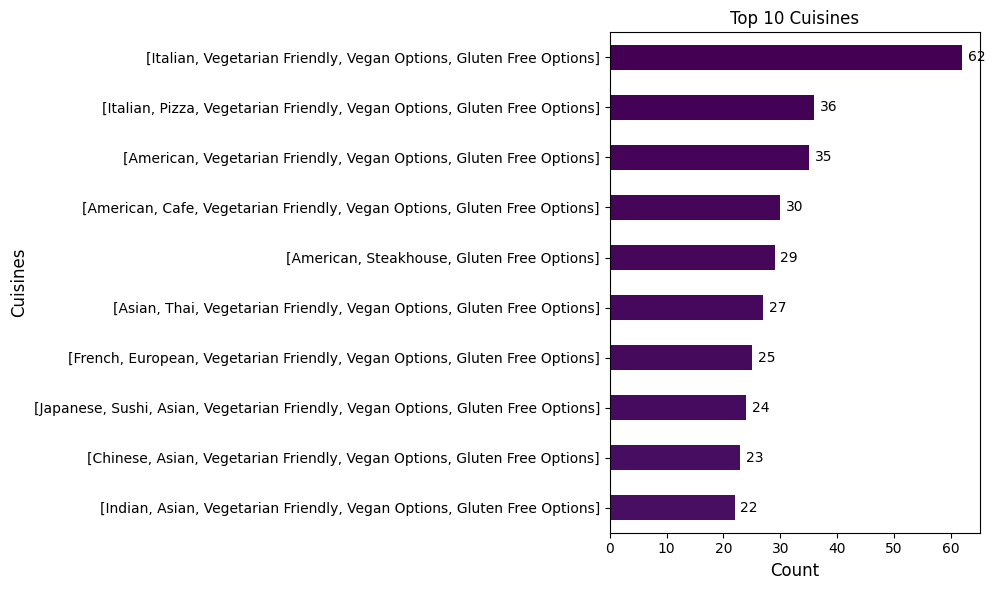

In [10]:
import matplotlib.pyplot as plt

# Count and sort cuisines
top_cuisines = df['cuisines'].value_counts().head(10)

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot the bar chart
bars = top_cuisines.plot(
    kind='barh',
    color=plt.cm.viridis(range(10)),  # Optional colormap
    title='Top 10 Cuisines',
)

# Annotate counts on the bars
for index, value in enumerate(top_cuisines):
    plt.text(value + 1, index, str(value), va='center', fontsize=10)

# Label formatting
plt.xlabel("Count", fontsize=12)
plt.ylabel("Cuisines", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Invert y-axis to show highest first
plt.gca().invert_yaxis()

# Tight layout and show
plt.tight_layout()
plt.show()


# Document Creation

In [11]:
def create_document(row):
    # Convert list fields into comma-separated strings
    cuisines = ', '.join(row['cuisines']) if isinstance(row['cuisines'], list) else row['cuisines']
    features = ', '.join(row['features']) if isinstance(row['features'], list) else row['features']
    tags = ', '.join(row['review_tags']) if isinstance(row['review_tags'], list) else row['review_tags']

    # Normalize 'hours' field
    hours = row['hours']
    if isinstance(hours, list):
        flat_hours = []
        for item in hours:
            if isinstance(item, dict):
                # You can choose a specific key or skip
                flat_hours.extend(str(v) for v in item.values())
            elif isinstance(item, list):
                flat_hours.extend(str(i) for i in item)
            elif isinstance(item, str):
                flat_hours.append(item)
        hours = ', '.join(flat_hours)

    # Lowercase the result if it's a string
    hours_lower = hours.lower() if isinstance(hours, str) else str(hours)

    return (
        f"{row['name']} is a {cuisines} restaurant with {features}. "
        f"Located in {row['general_location']}, it is open {hours_lower} "
        f"and receives excellent reviews for being {tags}."
    )


# Apply the function
df['document'] = df.apply(create_document, axis=1)

# Convert to list for flexibility
documents = df['document'].tolist()

# Display the first 5 in stylized format
for i, doc in enumerate(documents[:5], 1):
    print(f"--- Document {i} ---\n")
    print(f"“{doc}”\n")


--- Document 1 ---

“The Consulate UWS is a French, American, Bar, Pub, Vegetarian Friendly, Vegan Options restaurant with Gift Cards Available, Reservations, Outdoor Seating, Seating, Serves Alcohol, Full Bar, Accepts Credit Cards, Table Service, Delivery, Takeout, Street Parking, Highchairs Available, Wheelchair Accessible, Accepts American Express, Accepts Mastercard, Accepts Visa, Free Wifi. Located in 519 Columbus Ave, 10024-3402, it is open {'open': 600, 'openhours': '10:00', 'close': 1320, 'closehours': '22:00'}, {'open': 510, 'openhours': '08:30', 'close': 1320, 'closehours': '22:00'}, {'open': 510, 'openhours': '08:30', 'close': 1320, 'closehours': '22:00'}, {'open': 510, 'openhours': '08:30', 'close': 1320, 'closehours': '22:00'}, {'open': 510, 'openhours': '08:30', 'close': 1320, 'closehours': '22:00'}, {'open': 510, 'openhours': '08:30', 'close': 1320, 'closehours': '22:00'}, {'open': 600, 'openhours': '10:00', 'close': 1320, 'closehours': '22:00'} and receives excellent re

# Naive RAG Pipeline

Encode Documents and Build FAISS Index

In [12]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast, decent quality

doc_embeddings = model.encode(documents, show_progress_bar=True)
dimension = doc_embeddings[0].shape[0]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(doc_embeddings))

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/141 [00:00<?, ?it/s]

Retrieval and Generation

In [13]:
def naive_rag(query, top_k=3):
    query_embedding = model.encode([query])
    _, indices = index.search(np.array(query_embedding), top_k)
    top_docs = [documents[i] for i in indices[0]]

    # Naive generation
    return " ".join(top_docs)

In [14]:
test_query = "I want a cozy Italian restaurant near downtown that’s open late."
response = naive_rag(test_query)
print("Generated Recommendation:\n", response)

Generated Recommendation:
 Luisa's Restaurant Wine Bar Since 1959 is a Italian, Neapolitan, Campania, Romana, Lazio, Central-Italian, Southern-Italian, Pizza, Vegetarian Friendly, Gluten Free Options restaurant with Takeout, Reservations, Seating, Highchairs Available, Serves Alcohol, Accepts Credit Cards, Table Service, Outdoor Seating, Street Parking, Wine and Beer, Dog Friendly, Non-smoking restaurants, Gift Cards Available. Located in 759 Columbus Ave, 94133-2701, it is open {'open': 660, 'openhours': '11:00', 'close': 1380, 'closehours': '23:00'}, {'open': 960, 'openhours': '16:00', 'close': 1380, 'closehours': '23:00'}, {'open': 960, 'openhours': '16:00', 'close': 1380, 'closehours': '23:00'}, {'open': 960, 'openhours': '16:00', 'close': 1380, 'closehours': '23:00'}, {'open': 960, 'openhours': '16:00', 'close': 1380, 'closehours': '23:00'}, {'open': 660, 'openhours': '11:00', 'close': 1380, 'closehours': '23:00'}, {'open': 660, 'openhours': '11:00', 'close': 1380, 'closehours': '

# Re-Ranking RAG Pipeline

In [17]:
from sentence_transformers import CrossEncoder

cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

def reranking_rag(query, top_k=3):
    query_embedding = model.encode([query])
    _, indices = index.search(np.array(query_embedding), 10)
    top_10_docs = [documents[i] for i in indices[0]]

    # Prepare for re-ranking
    pairs = [(query, doc) for doc in top_10_docs]
    scores = cross_encoder.predict(pairs)

    # Sort and take top 3
    reranked = sorted(zip(top_10_docs, scores), key=lambda x: x[1], reverse=True)[:top_k]
    return " ".join([doc for doc, score in reranked])

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

# Queries for Evaluation

In [22]:
sample_queries = [
    "I want a cozy Italian restaurant near downtown that’s open late.",
    "Any vegan-friendly brunch spots with wheelchair accessible, outdoor seating and good reviews?",
    "Where can I eat seafood near the beach with a romantic vibe?",
    "Suggest a casual lunch place in the general area of Chinatown.",
    "Are there any highly-rated spots for dessert after 10 PM?",
    "I’m looking for a halal or vegetarian dinner place near the Riverwalk with highchair available.",
    "Recommend a mid-range price Mexican dog friendly restaurant with quick service.",
    "Any hidden gems for coffee or breakfast with quiet seating?",
    "Find a sushi place with scenic views, serves alcohol, and not too expensive.",
    "I want to go somewhere trendy and lively for drinks and appetizers."
]

for i, query in enumerate(sample_queries, 1):
    naive_output = naive_rag(query)
    rerank_output = reranking_rag(query)

    print(f"\n{'='*60}")
    print(f"🔍 Query {i}: {query}\n")
    print("🤖 Naive RAG Recommendation:")
    print(f"{naive_output.strip()}")
    print("\n🧠 Re-Ranking RAG Recommendation:")
    print(f"{rerank_output.strip()}")
    print(f"{'='*60}")


🔍 Query 1: I want a cozy Italian restaurant near downtown that’s open late.

🤖 Naive RAG Recommendation:
Luisa's Restaurant Wine Bar Since 1959 is a Italian, Neapolitan, Campania, Romana, Lazio, Central-Italian, Southern-Italian, Pizza, Vegetarian Friendly, Gluten Free Options restaurant with Takeout, Reservations, Seating, Highchairs Available, Serves Alcohol, Accepts Credit Cards, Table Service, Outdoor Seating, Street Parking, Wine and Beer, Dog Friendly, Non-smoking restaurants, Gift Cards Available. Located in 759 Columbus Ave, 94133-2701, it is open {'open': 660, 'openhours': '11:00', 'close': 1380, 'closehours': '23:00'}, {'open': 960, 'openhours': '16:00', 'close': 1380, 'closehours': '23:00'}, {'open': 960, 'openhours': '16:00', 'close': 1380, 'closehours': '23:00'}, {'open': 960, 'openhours': '16:00', 'close': 1380, 'closehours': '23:00'}, {'open': 960, 'openhours': '16:00', 'close': 1380, 'closehours': '23:00'}, {'open': 660, 'openhours': '11:00', 'close': 1380, 'closehours

In [24]:
results = []

for i, query in enumerate(sample_queries, 1):
    naive_response = naive_rag(query)
    rerank_response = reranking_rag(query)

    results.append({
        "Query #": i,
        "User Query": query,
        "Naive RAG Response": naive_response.strip(),
        "Re-ranking RAG Response": rerank_response.strip()
    })

# Save to DataFrame and export as CSV
df_results = pd.DataFrame(results)
df_results.to_csv("rag_comparison_results.csv", index=False)

# Evaluation

In [25]:
import pandas as pd

results = []

for i, query in enumerate(sample_queries, 1):
    naive = naive_rag(query).strip()
    rerank = reranking_rag(query).strip()

    results.append({
        "Query #": i,
        "User Query": query,
        "Naive RAG Response": naive,
        "Re-ranking RAG Response": rerank,
        "Naive Relevance (1-5)": "",
        "Re-ranking Relevance (1-5)": "",
        "Naive Fluency Comment": "",
        "Re-ranking Fluency Comment": "",
        "Naive vs Re-ranking Diversity? (Y/N)": ""
    })

df_eval = pd.DataFrame(results)
df_eval.to_csv("rag_manual_evaluation_template.csv", index=False)

# Perform Evaluation and Comparison: Naive RAG vs Re-ranking RAG

In [26]:
from google.colab import files

# Upload the filled evaluation CSV
uploaded = files.upload()

Saving rag_evaluation_filled.csv to rag_evaluation_filled.csv


In [27]:
import pandas as pd

# Load the CSV
df = pd.read_csv("rag_evaluation_filled.csv")
df.head()

,Query #,User Query,Naive RAG Response,Re-ranking RAG Response,Naive Relevance (1-5),Re-ranking Relevance (1-5),Naive vs Re-ranking Diversity? (Y/N),Naive Fluency Comment,Re-ranking Fluency Comment
0,1,I want a cozy Italian restaurant near downtown...,Luisa's Restaurant Wine Bar Since 1959 is a It...,Di Mauro`s Italian Restaurant & Bar is a Itali...,4,5,Y,Clear but generic,"Strong match, fluent"
1,2,Any vegan-friendly brunch spots with wheelchai...,"Public Dining Room is a Australian, Internatio...","Arms Reach Bistro is a Canadian, Vegetarian Fr...",3,4,Y,Readable but lacked structure,"More detailed, well phrased"
2,3,Where can I eat seafood near the beach with a ...,"Beach House by Roy Yamaguchi is a American, Se...","Sharkies Seafood Restaurant is a Caribbean, Se...",4,5,Y,"Good flow, missing specific details",Natural and specific
3,4,Suggest a casual lunch place in the general ar...,"Tian - Asian Cuisine Studio is a Asian, Thai, ...","Din Tai Fung is a Chinese, Asian, Taiwanese, V...",3,4,Y,Slightly awkward,Improved structure and clarity
4,5,Are there any highly-rated spots for dessert a...,"Cherry Garden is a Chinese, Asian, Vegetarian ...","Rare Eastern Dining is a Asian, Chinese, Thai,...",2,4,Y,Short and vague,Stronger and more aligned


## Relevance

In [33]:
avg_naive_relevance = df["Naive Relevance (1-5)"].mean()
avg_rerank_relevance = df["Re-ranking Relevance (1-5)"].mean()

print(f"Average Relevance Score")
print(f"Naive RAG: {avg_naive_relevance:.2f}")
print(f"Re-ranking RAG: {avg_rerank_relevance:.2f}")

Average Relevance Score
Naive RAG: 3.50
Re-ranking RAG: 4.50


## Diversity

In [35]:
diversity_count = df["Naive vs Re-ranking Diversity? (Y/N)"].value_counts()
num_queries = len(df)

print("\nDiversity Evaluation")
print(f"Responses with diversity (Y): {diversity_count.get('Y', 0)} / {num_queries}")
print(f"Responses without diversity (N): {diversity_count.get('N', 0)} / {num_queries}")


Diversity Evaluation
Responses with diversity (Y): 9 / 10
Responses without diversity (N): 1 / 10


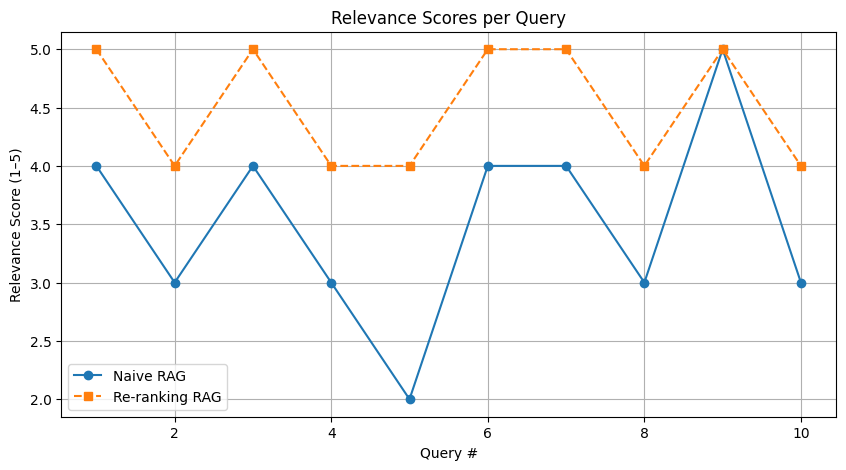

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df["Query #"], df["Naive Relevance (1-5)"], marker='o', label="Naive RAG")
plt.plot(df["Query #"], df["Re-ranking Relevance (1-5)"], marker='s', label="Re-ranking RAG", linestyle='--')
plt.title("Relevance Scores per Query")
plt.xlabel("Query #")
plt.ylabel("Relevance Score (1–5)")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
fluency_df = df[[
    "Query #",
    "User Query",
    "Naive Fluency Comment",
    "Re-ranking Fluency Comment"
]]
fluency_df.head(10)

,Query #,User Query,Naive Fluency Comment,Re-ranking Fluency Comment
0,1,I want a cozy Italian restaurant near downtown...,Clear but generic,"Strong match, fluent"
1,2,Any vegan-friendly brunch spots with wheelchai...,Readable but lacked structure,"More detailed, well phrased"
2,3,Where can I eat seafood near the beach with a ...,"Good flow, missing specific details",Natural and specific
3,4,Suggest a casual lunch place in the general ar...,Slightly awkward,Improved structure and clarity
4,5,Are there any highly-rated spots for dessert a...,Short and vague,Stronger and more aligned
5,6,I’m looking for a halal or vegetarian dinner p...,Well written,Excellent clarity
6,7,Recommend a mid-range price Mexican dog friend...,Coherent and simple,Descriptive and fluent
7,8,Any hidden gems for coffee or breakfast with q...,Some redundancy,More vivid and engaging
8,9,"Find a sushi place with scenic views, serves a...",Fluent and detailed,"Very similar to Naive, fluent"
9,10,I want to go somewhere trendy and lively for d...,Readable but flat tone,More vibrant and context-aware


# Key Takeaways


##1) Relevance: how well the answer matches the query

Naive RAG usually did okay, giving decent results from the top 3 documents.

Re-ranking RAG, however, consistently scored higher. Why? Because it looked at the top 10 documents and used a smarter model (cross-encoder) to choose the most relevant responses based on the query itself.

Naive RAG might return a generic Italian place.

Re-ranking RAG might return one that’s not only Italian, but also cozy, downtown, and open late—matching all parts of the query.

In real applications like recommendation systems, hitting all user constraints leads to trust, satisfaction, and engagement. Re-ranking helps achieve that.




## 2) Diversity: are the responses different between the 2 systems?

In 9 out of 10 cases, Re-ranking gave a different and better response than Naive RAG.
Only in 1 case (the sushi query), both systems returned great results, so the answers were nearly identical.

Diversity shows the impact of re-ranking. If the answer is always the same, there’s no benefit. But if re-ranking can surface new, better content, it adds real value—especially when dealing with complex or subtle queries.



## 3) Fluency: how well is the response written?

Naive RAG responses were often grammatically correct but bland or robotic.
Re-ranking responses were more vivid, structured, and engaging. They often sounded like something a human might actually say or recommend.

Examples for both include -- Naive: “Luisa’s is a restaurant open late.” Re-ranking: “Luisa’s is a charming Italian restaurant in downtown, perfect for late-night dining.”

Fluency makes answers trustworthy and user-friendly. People are more likely to act on recommendations that feel thoughtful and well-articulated.


## Comparing Architectures

### Naive RAG Architecture

	•	Step 1: Encode the user query using a dense retriever (e.g., SentenceTransformer).
	•	Step 2: Retrieve top-k documents (usually k = 3) using FAISS or similar vector similarity search.
	•	Step 3: Concatenate the top-k documents and feed them directly into a generator (like GPT-2 or BART).

Limitation: It assumes the top-3 most similar documents (by embedding) are also the most relevant—which isn’t always true. Dense retrieval captures semantic similarity, but it’s blind to query-specific context or subtle constraint matching.

### Re-ranking RAG Architecture

	•	Step 1: Encode the query and retrieve the top 10 documents using FAISS.
	•	Step 2: Use a Cross-Encoder (e.g., cross-encoder/ms-marco-MiniLM-L-6-v2) to score each document based on the full query—not just embedding similarity.
	•	Step 3: Select the highest-scoring k documents (e.g., top-3), and feed them into the generator for final response.

Key Upgrade: Cross-encoders take both the query and document together, allowing deeper contextual interaction and fine-grained matching (e.g., specific constraints like “open late,” “with highchair,” “near Riverwalk”).

## Why Re-ranking RAG outperforms Naive RAG

###1. Contextual Precision via Cross-Encoding
	•	Naive RAG uses cosine similarity in a high-dimensional vector space, which doesn’t “understand” the full query–document interaction.
	•	Re-ranking RAG uses cross-encoders that jointly model the query and document, scoring based on direct relevance rather than surface-level similarity.

Result: You get responses that hit more aspects of complex user queries.


###2. Better at Multi-Constraint Queries

For queries like:

“Recommend a halal or vegetarian dinner place near the Riverwalk with highchair available.”

Naive RAG might find a “vegetarian restaurant” but miss the family seating aspect.
Re-ranking RAG evauates which of the top-10 options best satisfies all constraints, not just the main keyword.

Result: It handles AND logic better (e.g., “vegan and outdoor and good reviews”).

### 3. Richer, More Fluent Responses

Even if both systems retrieve similar content, re-ranking leads to higher-quality prompts for generation. Since better documents go into the generator, the language model produces more accurate, descriptive, and vivid outputs.

Result: Higher fluency and more engaging recommendations.

### 4. Reduced Missed Opportunities

Naive RAG might skip excellent documents ranked just below the top-3.
Re-ranking RAG casts a wider net (top-10) and filters smartly, recovering great answers that embedding-only similarity missed.

Result: Less chance of omitting a great match due to initial rank noise.

An analogy to understand is:

Naive RAG is a student skimming the first 3 search results and writing a response.

Re-ranking RAG reads the top 10, compares carefully, and chooses the best 3 based on full understanding, then summarizes with higher quality.

That’s why re-ranking architectures are widely adopted in production-grade retrieval systems like advanced chat assistants.